# BAB I. Perkenalan

```
=================================================================================================================
MILESTONE 2

Nama: Yohanes Raditya Wirawan Aruan 

Batch: FTDS-HCK-022

Dataset: Breast_Cancer.csv

Objective:

Program yang akan dibuat untuk memperkirakan kelangsungan hidup pasien kanker. Bagi pasien yang terprediksi memiliki risiko kematian lebih tinggi, akan diberikan beberapa perawatan khusus dan informasi dukungan agar mereka bisa mendapatkan perawatan terbaik. Sementara, bagi pasien yang terprediksi memiliki risiko lebih rendah, program ini akan memberikan saran tentang perawatan yang dapat membantu menjaga kondisi kesehatan.

==================================================================================================================
```

# BAB II. Import Libraries

In [84]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import recall_score, make_scorer
from scipy.stats import iqr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from scipy.stats import normaltest, pearsonr, spearmanr, kendalltau, chi2_contingency
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# BAB III. Data Loading

In [15]:
# Membuat function untuk membaca file csv
df_breast = pd.read_csv("Breast_Cancer.csv")

In [16]:
# Membuat memunculkan semua kolom
pd.set_option('display.max_columns', None)

In [17]:
df_breast['Status'].value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

# BAB IV. Exploratory Data Analysis (EDA)

In [18]:
df_breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

**<u>Insight: </u>**

Dataset ini memiliki 4.024 baris dan 16 kolom. 

Tipe Data Kolom:

Ada 5 kolom bertipe int64 (nilai numerik), yang kemungkinan berhubungan dengan usia, ukuran tumor, jumlah node regional yang diperiksa dan positif, serta jumlah bulan bertahan hidup.

Ada 11 kolom bertipe object (nilai kategori atau teks), seperti ras, status perkawinan, status hormon, stadium kanker, dan status akhir.




In [19]:
df_breast.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

**<u>Insight: </u>**

Tidak ada data yang missing value

In [20]:
df_breast.duplicated().sum()

1

**<u>Insight: </u>**

terdapat 1 data yang duplicated

In [21]:
df_breast.head(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


In [88]:
df_breast.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

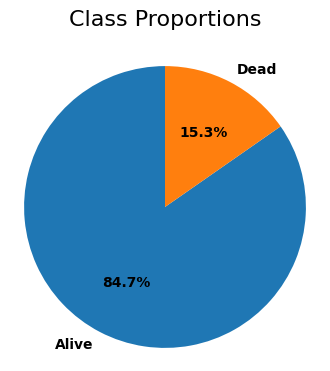

In [101]:
# Menghitung jumlah untuk setiap ukuran perusahaan
target_size = df_breast['Status'].value_counts()

# Membuat pie chart
plt.figure(figsize=(4, 4))
plt.pie(target_size, labels=target_size.index, autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold'})

# Menambahkan judul
plt.title('Class Proportions', fontsize=16, pad=20)
plt.axis('equal') 

plt.show()

**<u>Insight: </u>**

- Sebagian besar data atau populasi dalam dataset ini berada dalam kategori "Alive", yang mencakup 84.7% dari total.

- Hanya 15.3% dari data atau populasi yang berada dalam kategori "Dead".

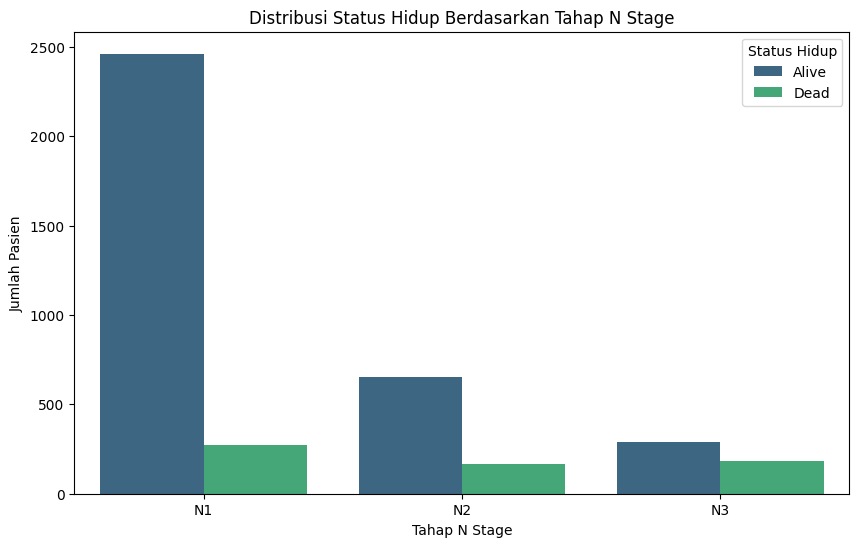

In [99]:
# Count plot untuk N Stage berdasarkan Status Hidup
plt.figure(figsize=(10, 6))
sns.countplot(data=df_breast, x='N Stage', hue='Status', palette='viridis')
plt.title('Distribusi Status Hidup Berdasarkan Tahap N Stage')
plt.xlabel('Tahap N Stage')
plt.ylabel('Jumlah Pasien')
plt.legend(title='Status Hidup')
plt.show()


**<u>Insight: </u>**

- N1: Keterlibatan Ringan Kelenjar Getah Bening (Kanker telah menyebar ke 1-3 kelenjar getah bening di bawah lengan (axillary nodes) atau ada sel kanker kecil di kelenjar getah bening di dekat tulang dada)

- N2: Keterlibatan Sedang Kelenjar Getah Bening (Kanker telah menyebar ke 4-9 kelenjar getah bening di bawah lengan (axillary nodes))

- N3: Keterlibatan Berat Kelenjar Getah Bening



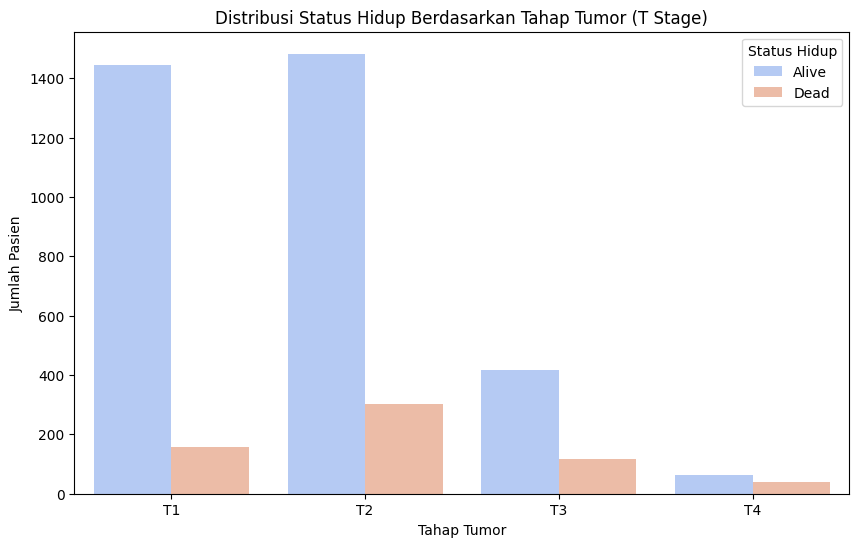

In [89]:
# Count plot untuk T Stage berdasarkan Status Hidup
plt.figure(figsize=(10, 6))
sns.countplot(data=df_breast, x='T Stage ', hue='Status', palette='coolwarm')
plt.title('Distribusi Status Hidup Berdasarkan Tahap Tumor (T Stage)')
plt.xlabel('Tahap Tumor')
plt.ylabel('Jumlah Pasien')
plt.legend(title='Status Hidup')
plt.show()


**<u>Insight: </u>**

- T1: Diameter tumor asli kurang dari atau sama dengan 2 sentimeter

- T2: Diameter tumor asli antara 2 dan 5 sentimeter

- T3: Diameter tumor asli lebih besar dari 5 sentimeter

- T4: Tumor asli telah menyerang organ lain, seperti dinding dada atau kulit

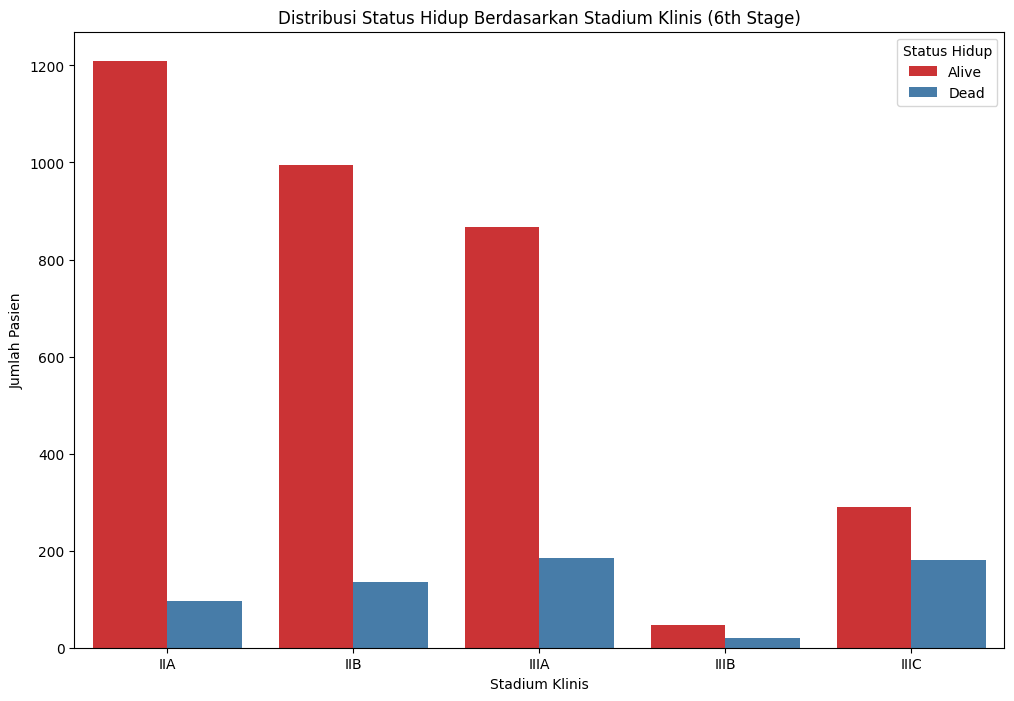

In [91]:

# Mengatur urutan kategori '6th Stage'
stage_order = ['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC']  # Urutan stadium yang diinginkan

# Mengonversi kolom '6th Stage' menjadi kategori dengan urutan yang benar
df_breast['6th Stage'] = pd.Categorical(df_breast['6th Stage'], categories=stage_order, ordered=True)

# Count plot untuk '6th Stage' berdasarkan 'Status'
plt.figure(figsize=(12, 8))
sns.countplot(data=df_breast, x='6th Stage', hue='Status', palette='Set1')
plt.title('Distribusi Status Hidup Berdasarkan Stadium Klinis (6th Stage)')
plt.xlabel('Stadium Klinis')
plt.ylabel('Jumlah Pasien')
plt.legend(title='Status Hidup')
plt.show()


**<u>Insight: </u>**

- IIA: Tumor berukuran 2-5 cm dan tidak ada penyebaran ke kelenjar getah bening, atau tumor lebih besar dari 5 cm tetapi tanpa penyebaran kelenjar getah bening.

- IIB: Tumor berukuran lebih besar atau ada penyebaran kanker ke kelenjar getah bening yang terdekat.

- IIIA: Kanker telah menyebar ke beberapa kelenjar getah bening atau ada penyebaran tumor besar di jaringan sekitar payudara.

- IIIB: Kanker telah menyebar jauh ke jaringan sekitar payudara (termasuk dinding dada atau kulit).

- IIIC: Kanker telah menyebar ke kelenjar getah bening di area leher atau dada bagian atas.

# BAB V. Feature Engineering

## a. Split Feature X dan y Target 

In [23]:
# Membagi  feature dan target
# X buat feature
X = df_breast.drop('Status', axis=1)
# y buat target
y = df_breast['Status']

## b. Split Train Test dan Test Set

In [24]:
# Split Train test dan test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1, stratify=y)
print('Train size', X_train.shape)
print('Test size', X_test.shape)

Train size (3219, 15)
Test size (805, 15)


**<u>Insight: </u>**

Pembagian Data untuk Evaluasi Model:

Dengan membagi data menjadi set pelatihan (80%) dan set pengujian (20%), yang berguna untuk melatih model pada bagian data tertentu dan mengevaluasi kinerjanya pada data yang belum pernah dilihat (set pengujian). Ini membantu dalam memperkirakan seberapa baik model akan berperforma pada data baru.

Pemisahan Data yang Konsisten:
Penggunaan random_state=1 memastikan bahwa pembagian dataset bersifat konsisten di berbagai kali percobaan. Ini memungkinkan hasil yang dapat direproduksi setiap kali kode dijalankan.

Proporsi Kelas yang Seimbang:
Menggunakan stratify=y membantu mempertahankan distribusi kelas variabel target (y) yang seimbang di set pelatihan dan pengujian. Hal ini sangat penting ketika menghadapi dataset yang tidak seimbang (misalnya, ketika satu kelas jumlahnya jauh lebih banyak daripada kelas lainnya) untuk memastikan bahwa model dilatih dan dievaluasi pada distribusi data yang serupa.

stratify untuk menyesuaikan dengan target attau status

## c. Split Num dan Cat Cols

In [25]:
# Pembuatan fungsi pengecekkan cardinality
def cek_semua_cardinality(data):
    # Tampilan dengan max column
    pd.set_option('display.max_colwidth', None)

    # output bernama listItem
    listItem = []

    # Looping column di dalam dataframe
    for col in data.columns:
        # Menambahkan 'nama kolom', 'jumlah nilai unique', 'nilai unique' ke listItem
        listItem.append([col, data[col].nunique(), data[col].unique()])

    # Hasil dalam dataframe
    kesimpulan_cardinality= pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

    return kesimpulan_cardinality

In [26]:
# cek cardinality di X_train
cek_semua_cardinality(X_train)

,nama kolom,jumlah nilai unique,nilai unique
0,Age,40,"[53, 61, 42, 65, 50, 63, 51, 48, 58, 46, 57, 52, 54, 67, 44, 43, 60, 56, 66, 49, 40, 62, 55, 69, 45, 59, 36, 64, 47, 41, 31, 39, 37, 30, 38, 68, 33, 35, 32, 34]"
1,Race,3,"[White, Other, Black]"
2,Marital Status,5,"[Single , Married, Widowed, Divorced, Separated]"
3,T Stage,4,"[T1, T2, T3, T4]"
4,N Stage,3,"[N1, N3, N2]"
5,6th Stage,5,"[IIA, IIB, IIIC, IIIA, IIIB]"
6,differentiate,4,"[Moderately differentiated, Poorly differentiated, Well differentiated, Undifferentiated]"
7,Grade,4,"[2, 3, 1, anaplastic; Grade IV]"
8,A Stage,2,"[Regional, Distant]"
9,Tumor Size,106,"[20, 17, 35, 65, 30, 34, 19, 18, 63, 22, 16, 44, 50, 41, 32, 69, 40, 60, 11, 21, 12, 56, 25, 23, 28, 7, 5, 120, 52, 26, 140, 27, 59, 14, 42, 31, 15, 24, 46, 37, 43, 47, 80, 85, 13, 45, 55, 90, 100, 29, 53, 81, 68, 39, 36, 130, 9, 70, 8, 75, 48, 38, 6, 97, 33, 76, 62, 10, 1, 117, 51, 77, 57, 3, 66, 101, 72, 54, 82, 107, 94, 49, 61, 86, 58, 74, 2, 92, 133, 95, 84, 103, 96, 104, 4, 108, 78, 110, 115, 125, ...]"


**<u>Insight: </u>**

Dari hasil function diatas menghasilkan pengecekkan cek cardinality dan nilai unik. Dari hal tersebut dapat di lanjutkan untuk menginisialisasi numerik kolom dan kategori kolom

In [27]:
# Menginisialisasi numcol dan cat col data set 1
num_col = ['Age', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Tumor Size']
cat_col = ['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']

## d. Handling Outliers

In [28]:
# Pembuatan Fungsi Cek Outliers
def cek_outliers(data, cols):
    
    skewness = [data[col].skew() for col in cols]

    # Membuat list untuk menyimpan setiap row hasil per kolom
    listItem = [] 

    for id, col in enumerate(cols):
        if skewness[id] > 1 or skewness[id] < -1:
            category = 'Highly Skewed'
            IQR = iqr(data[col])
            lower_boundary = data[col].quantile(0.25) - 3 * IQR
            upper_boundary = data[col].quantile(0.75) + 3 * IQR
        elif skewness[id] > 0.5 or skewness[id] < -0.5:
            category = 'Moderately Skewed'
            IQR = iqr(data[col])
            lower_boundary = data[col].quantile(0.25) - 1.5 * IQR
            upper_boundary = data[col].quantile(0.75) + 1.5 * IQR
        else:
            category = 'Normal'
            lower_boundary = data[col].mean() - 3 * data[col].std()
            upper_boundary = data[col].mean() + 3 * data[col].std()

        outlier = data[(data[col] > upper_boundary) | (data[col] < lower_boundary)]
        outlier_num = len(outlier)
        outlier_percent = outlier_num / len(data) * 100

        # Menambahkan hasil analisis ke listItem sebagai satu row
        listItem.append([
            # Nama kolom
            col,                      
            #SKewness
            round(skewness[id], 2),   
            # Distribusi Kategori
            category,                  
            # Lower Boundary
            round(lower_boundary, 2),  
            # Upper Boundary
            round(upper_boundary, 2),  
            # Jumlah Outliers
            outlier_num,               
            # Persentase Outlier
            round(outlier_percent, 2)  
        ])

    # Membuat DataFrame dari listItem
    df_distribution = pd.DataFrame(listItem, columns=[
        'Column', 'Skewness', 'Distribution', 'LowerBoundary', 'UpperBoundary', 'Jumlah Outlier', 'Percent Outlier (%)'
    ])

    return df_distribution


In [29]:
# Cek outliers pada X_train dan num_cols
data_outliers = cek_outliers(X_train,num_col)
data_outliers 

,Column,Skewness,Distribution,LowerBoundary,UpperBoundary,Jumlah Outlier,Percent Outlier (%)
0,Age,-0.21,Normal,26.99,80.77,0,0.00
1,Regional Node Examined,0.85,Moderately Skewed,-6.00,34.00,57,1.77
2,Reginol Node Positive,2.67,Highly Skewed,-11.00,17.00,115,3.57
3,Survival Months,-0.60,Moderately Skewed,5.00,141.00,16,0.50
4,Tumor Size,1.73,Highly Skewed,-50.00,104.00,32,0.99


**<u>Insight: </u>**

Dari hasil diatas tidak ada hasil persen outleirs yang lebih besar dari 5% sehingga tidak perlu di handling outliers

## e. Handling Missing Value

In [30]:
X_train.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
dtype: int64

**<u>Insight: </u>**

Dari hasil diatas tidak ada missing value

## f. Feature Selection

In [31]:
# Fungsi untuk memeriksa korelasi
def cek_korelasi(X, y, num_cols, cat_cols, target_is_category=False):
    # Inisialisasi lists 
    cols = []
    jenis_col = []
    metode_uji = []
    corr = []
    p_values = []
    interpretasi = []

    # Menguji kolom numerik: Pearson, Spearman, atau Kendall Tau
    for col in num_cols:
        # Menguji apakah data normal menggunakan normaltest
        _, p_normal = normaltest(X[col].dropna())
        # Jika target adalah kategori
        if target_is_category:  
            corr_coef, p_value = kendalltau(X[col], y)
            metode = 'Kendall Tau'
        else:
            # Data berdistribusi normal
            if p_normal > 0.05: 
                corr_coef, p_value = pearsonr(X[col], y)
                metode = 'Pearson'
            # Data tidak berdistribusi normal
            else:  
                corr_coef, p_value = spearmanr(X[col], y)
                metode = 'Spearman'

        cols.append(col)
        jenis_col.append('numerical')
        metode_uji.append(metode)
        corr.append(corr_coef)
        p_values.append(p_value)
        interpretasi.append('Ada korelasi' if p_value < 0.05 else 'Tidak ada korelasi')

    # Menguji kolom kategorikal: Chi-Square
    for col in cat_cols:
        # Membuat tabel kontingensi untuk uji Chi-Square
        contingency_table = pd.crosstab(X[col], y)
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Perhitunggan Creamer's V 
        # Total number of observations
        n = contingency_table.sum().sum()  # Total number of observations
        k, r = contingency_table.shape  # Number of categories in each variable
        cramer_v = np.sqrt(chi2 / (n * (min(k - 1, r - 1))))  # Cramér's V formula
        metode = 'Chi-Square with Cramér\'s V'

        cols.append(col)
        jenis_col.append('categorical')
        metode_uji.append(metode)
        corr.append(cramer_v)
        p_values.append(p_value)
        interpretasi.append('Ada korelasi' if p_value < 0.05 else 'Tidak ada korelasi')

    # Membuat DataFrame untuk menampilkan hasil
    result_df = pd.DataFrame({
        'Nama Kolom': cols,
        'Jenis Kolom': jenis_col,
        'Metode Uji': metode_uji,
        'Nilai Korelasi': corr,
        'p_value': p_values,
        'Hasil': interpretasi
    })

    return result_df

**<u>Insight: </u>**

Fungsi untuk menentukan apakah ada hubungan yang signifikan antara fitur-fitur dalam dataset dan target dan memilih fitur-fitur yang memiliki korelasi yang signifikan dengan target untuk dimasukkan dalam model.

In [32]:
X_train.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months'],
      dtype='object')

In [33]:
X_train.columns = X_train.columns.str.strip()

In [34]:
cek_korelasi(X_train,y_train,num_col,cat_col, target_is_category=True)

,Nama Kolom,Jenis Kolom,Metode Uji,Nilai Korelasi,p_value,Hasil
0,Age,numerical,Kendall Tau,0.041140,4.886762e-03,Ada korelasi
1,Regional Node Examined,numerical,Kendall Tau,0.022143,1.310004e-01,Tidak ada korelasi
2,Reginol Node Positive,numerical,Kendall Tau,0.199567,1.216519e-37,Ada korelasi
3,Survival Months,numerical,Kendall Tau,-0.342939,7.929688e-124,Ada korelasi
4,Tumor Size,numerical,Kendall Tau,0.128818,1.154853e-18,Ada korelasi
5,Race,categorical,Chi-Square with Cramér's V,0.080054,3.314287e-05,Ada korelasi
6,Marital Status,categorical,Chi-Square with Cramér's V,0.072038,2.205342e-03,Ada korelasi
7,T Stage,categorical,Chi-Square with Cramér's V,0.161139,5.224169e-18,Ada korelasi
8,N Stage,categorical,Chi-Square with Cramér's V,0.270163,9.580953e-52,Ada korelasi
9,6th Stage,categorical,Chi-Square with Cramér's V,0.272265,1.840472e-50,Ada korelasi


**<u>Insight: </u>**

Hubungan kuat untuk data kategorikal: N Stage dan 6th Stage menunjukkan korelasi dengan variabel target, yang menunjukkan adanya pengaruh yang lebih besar dibandingkan fitur lainnya.
Korelasi lemah namun signifikan: banyak fitur menunjukkan korelasi yang lemah namun signifikan, seperti Age, Tumor Size, dan status hormon (Estrogen & Progesterone). Ini berarti meskipun efeknya kecil, hubungan tersebut tidak boleh diabaikan.
Korelatif negatif: variabel Survival Months menunjukkan korelasi negatif yang moderat, yang berarti semakin lama kelangsungan hidup, ada kecenderungan penurunan nilai variabel target.
Pengaruh Signifikan dari Tahapan Kanker: Tahap-tahap kanker (T, N, 6th Stage) menunjukkan korelasi yang signifikan, mengindikasikan bahwa tahapan kanker adalah indikator penting dalam mempengaruhi variabel target.



## g. Split Num and Cat Columns after correlation

In [35]:
X_train.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months'],
      dtype='object')

In [36]:
#Inisialisasi num_cols dan cat_ohe

# num angka semua:  Age , tumor size, survival month
# ohe: Race, Martial Status, esterogen, pregesterone 
# oe: T Stage, N stage, 6th Stage, differentiate, Grade, A Stage

num_col = ['Age','Tumor Size', 'Reginol Node Positive','Survival Months']
cat_ohe = ['Race','Marital Status', 'Estrogen Status', 'Progesterone Status']

In [37]:
# Feature Encoding Target

encoder = LabelEncoder()
encoder.fit(y_train)

y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [38]:
transformer = ColumnTransformer([
('scaler',  MinMaxScaler(), num_col),
('encoder_ohe', OneHotEncoder(), cat_ohe)
])
transformer

ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                 ['Age', 'Tumor Size', 'Reginol Node Positive',
                                  'Survival Months']),
                                ('encoder_ohe', OneHotEncoder(),
                                 ['Race', 'Marital Status', 'Estrogen Status',
                                  'Progesterone Status'])])

# BAB VI. Model Definition

In [39]:
# Making pipeline for LogReg
pipe_KNN = Pipeline([
('transformer', transformer),
('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Making pipeline for SVC
pipe_SVM = Pipeline([
('transformer', transformer),
('classifier', SVC(kernel='linear',class_weight='balanced', probability=True)
)
])

# Making pipeline for Decision Tree
pipe_DT = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier(class_weight='balanced'))
])

# Making pipeline for Random Forest
pipe_RF = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier(class_weight='balanced'))
])

# Making pipeline for XGBoost
pipe_XGB = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier())
])

**<u>Insight: </u>**

Membuat beberapa pipeline klasifikasi menggunakan berbagai algoritma seperti KNN, SVC, Decision Tree, Random Forest, dan XGBoost. Penggunaan class_weight='balanced' pada beberapa model menunjukkan bahwa kode ini dirancang untuk menangani ketidakseimbangan. Selanjutknya akan dilakukan pemilihan model yang terbaik

# BAB VII. Model Training

## a. KNN

In [40]:
# Model Training
pipe_KNN.fit(X_train, y_train_encoded)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Age', 'Tumor Size',
                                                   'Reginol Node Positive',
                                                   'Survival Months']),
                                                 ('encoder_ohe',
                                                  OneHotEncoder(),
                                                  ['Race', 'Marital Status',
                                                   'Estrogen Status',
                                                   'Progesterone Status'])])),
                ('classifier', KNeighborsClassifier())])

In [41]:
print('Training Score: ',round(pipe_KNN.score(X_train, y_train_encoded),4))
print('Testing Score: ', round(pipe_KNN.score(X_test, y_test_encoded),4))

/Users/radityaaruan/Documents/Miniconda/miniconda3/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Training Score:  0.9099
Testing Score:  0.8857


In [42]:
# # Model Prediction

y_pred_train_knn = pipe_KNN.predict(X_train)
y_pred_test_knn = pipe_KNN.predict(X_test)

In [43]:
print("Training Predictions:", y_pred_train_knn)
print("Test Predictions:", y_pred_test_knn)

Training Predictions: [0 0 0 ... 0 0 1]
Test Predictions: [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0

In [44]:
# Model Evaluation - Train Set & Test Set

print(classification_report(y_train_encoded, y_pred_train_knn))
print(classification_report(y_test_encoded, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2726
           1       0.87      0.48      0.62       493

    accuracy                           0.91      3219
   macro avg       0.89      0.74      0.79      3219
weighted avg       0.91      0.91      0.90      3219

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       682
           1       0.79      0.34      0.48       123

    accuracy                           0.89       805
   macro avg       0.84      0.66      0.71       805
weighted avg       0.88      0.89      0.87       805



**<u>Insight: </u>**

Classification report KNN, difokuskan untuk mencari proposi positif yang benar-benar terdeteksi dengan benar. Oleh karena itu, sebagai patokan modelnya adalah nilai recall. 
Dari hasil classification report diatas dapat dikatakan model ini overfitt, terlihat pada nilai recall trainnya lebih besar daripada recall testnya.

In [45]:
# Cross Validation for Recall

recall_train_cross_val = cross_val_score(pipe_KNN,
                                          X_train,
                                          y_train_encoded,
                                          cv=3,
                                          scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', 
      (recall_train_cross_val.mean() - recall_train_cross_val.std()), 
      '-', 
      (recall_train_cross_val.mean() + recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.34756098 0.37804878 0.33939394]
Recall Score - Mean - Cross Validation :  0.3550012318305001
Recall Score - Std - Cross Validation  :  0.016634647465871507
Recall Score - Range of Test-Set       :  0.3383665843646286 - 0.3716358792963716


**<u>Insight: </u>**

Cross validation report diatas, difokuskan pada nilai mean dan std untuk menilai model KNN merupakan model yang valid terhadap data.

## b. SVM

In [46]:
# Model Training
pipe_SVM.fit(X_train, y_train_encoded)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Age', 'Tumor Size',
                                                   'Reginol Node Positive',
                                                   'Survival Months']),
                                                 ('encoder_ohe',
                                                  OneHotEncoder(),
                                                  ['Race', 'Marital Status',
                                                   'Estrogen Status',
                                                   'Progesterone Status'])])),
                ('classifier',
                 SVC(class_weight='balanced', kernel='linear',
                     probability=True))])

In [47]:
print('Training Score: ',round(pipe_SVM.score(X_train, y_train_encoded),4))
print('Testing Score: ', round(pipe_SVM.score(X_test, y_test_encoded),4))

Training Score:  0.8148
Testing Score:  0.7988


In [48]:
# # Model Prediction

y_pred_train_svm = pipe_SVM.predict(X_train)
y_pred_test_svm = pipe_SVM.predict(X_test)

In [49]:
print("Training Predictions:", y_pred_train_svm)
print("Test Predictions:", y_pred_test_svm)

Training Predictions: [0 1 0 ... 0 0 1]
Test Predictions: [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0

In [50]:
# Model Evaluation - Train Set & Test Set

print(classification_report(y_train_encoded, y_pred_train_svm))
print(classification_report(y_test_encoded, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      2726
           1       0.44      0.75      0.55       493

    accuracy                           0.81      3219
   macro avg       0.69      0.79      0.72      3219
weighted avg       0.87      0.81      0.83      3219

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       682
           1       0.41      0.71      0.52       123

    accuracy                           0.80       805
   macro avg       0.67      0.76      0.70       805
weighted avg       0.86      0.80      0.82       805



**<u>Insight: </u>**

Classification report SVM, difokuskan untuk mencari proposi positif yang benar-benar terdeteksi dengan benar. Oleh karena itu, sebagai patokan modelnya adalah nilai recall. 
Dari hasil classification report diatas dapat dikatakan model ini goodfit

In [51]:
# Cross Validation for Recall

recall_train_cross_val = cross_val_score(pipe_SVM,
                                          X_train,
                                          y_train_encoded,
                                          cv=3,
                                          scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', 
      (recall_train_cross_val.mean() - recall_train_cross_val.std()), 
      '-', 
      (recall_train_cross_val.mean() + recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.73170732 0.75609756 0.72727273]
Recall Score - Mean - Cross Validation :  0.7383592017738358
Recall Score - Std - Cross Validation  :  0.01267289593457668
Recall Score - Range of Test-Set       :  0.7256863058392592 - 0.7510320977084125


**<u>Insight: </u>**

Cross validation report diatas, difokuskan pada nilai mean dan std untuk menilai model KNN merupakan model yang valid terhadap data.

## b. Decision Tree

In [52]:
# Model Training
pipe_DT.fit(X_train, y_train_encoded)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Age', 'Tumor Size',
                                                   'Reginol Node Positive',
                                                   'Survival Months']),
                                                 ('encoder_ohe',
                                                  OneHotEncoder(),
                                                  ['Race', 'Marital Status',
                                                   'Estrogen Status',
                                                   'Progesterone Status'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced'))])

In [53]:
print('Training Score: ',round(pipe_DT.score(X_train, y_train_encoded),4))
print('Testing Score: ', round(pipe_DT.score(X_test, y_test_encoded),4))

Training Score:  1.0
Testing Score:  0.8298


In [54]:
# # Model Prediction
y_pred_train_dt = pipe_DT.predict(X_train)
y_pred_test_dt = pipe_DT.predict(X_test)

In [55]:
print("Training Predictions:", y_pred_train_dt)
print("Test Predictions:", y_pred_test_dt)

Training Predictions: [0 0 0 ... 1 1 1]
Test Predictions: [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0

In [56]:
# Model Evaluation - Train Set & Test Set

print(classification_report(y_train_encoded, y_pred_train_dt))
print(classification_report(y_test_encoded, y_pred_test_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2726
           1       1.00      1.00      1.00       493

    accuracy                           1.00      3219
   macro avg       1.00      1.00      1.00      3219
weighted avg       1.00      1.00      1.00      3219

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       682
           1       0.45      0.46      0.45       123

    accuracy                           0.83       805
   macro avg       0.67      0.68      0.68       805
weighted avg       0.83      0.83      0.83       805



**<u>Insight: </u>**

Classification report Decision Tree, difokuskan untuk mencari proposi positif yang benar-benar terdeteksi dengan benar. Oleh karena itu, sebagai patokan modelnya adalah nilai recall. 
Dari hasil classification report diatas dapat dikatakan model ini overfitt, terlihat pada nilai recall trainnya lebih besar daripada recall testnya.

In [57]:
# Cross Validation for Recall

recall_train_cross_val = cross_val_score(pipe_DT,
                                          X_train,
                                          y_train_encoded,
                                          cv=3,
                                          scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', 
      (recall_train_cross_val.mean() - recall_train_cross_val.std()), 
      '-', 
      (recall_train_cross_val.mean() + recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.45731707 0.5        0.41818182]
Recall Score - Mean - Cross Validation :  0.45849963045084996
Recall Score - Std - Cross Validation  :  0.03341259792651903
Recall Score - Range of Test-Set       :  0.42508703252433094 - 0.491912228377369


**<u>Insight: </u>**

Cross validation report diatas, difokuskan pada nilai mean dan std untuk menilai model Decision Tree merupakan model yang valid terhadap data.

## c. Random Forest

In [58]:
# Model Training
pipe_RF.fit(X_train, y_train_encoded)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Age', 'Tumor Size',
                                                   'Reginol Node Positive',
                                                   'Survival Months']),
                                                 ('encoder_ohe',
                                                  OneHotEncoder(),
                                                  ['Race', 'Marital Status',
                                                   'Estrogen Status',
                                                   'Progesterone Status'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced'))])

In [59]:
print('Training Score: ',round(pipe_RF.score(X_train, y_train_encoded),4))
print('Testing Score: ', round(pipe_RF.score(X_test, y_test_encoded),4))

Training Score:  1.0
Testing Score:  0.9006


In [60]:
# # Model Prediction

y_pred_train_rf = pipe_RF.predict(X_train)
y_pred_test_rf = pipe_RF.predict(X_test)

In [61]:
print("Training Predictions:", y_pred_train_rf)
print("Test Predictions:", y_pred_test_rf)

Training Predictions: [0 0 0 ... 1 1 1]
Test Predictions: [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0

In [62]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_train_encoded, y_pred_train_rf))
print(classification_report(y_test_encoded, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2726
           1       1.00      1.00      1.00       493

    accuracy                           1.00      3219
   macro avg       1.00      1.00      1.00      3219
weighted avg       1.00      1.00      1.00      3219

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       682
           1       0.82      0.45      0.58       123

    accuracy                           0.90       805
   macro avg       0.86      0.71      0.76       805
weighted avg       0.89      0.90      0.89       805



**<u>Insight: </u>**

Classification report Random Forest, difokuskan untuk mencari proposi positif yang benar-benar terdeteksi dengan benar. Oleh karena itu, sebagai patokan modelnya adalah nilai recall. 
Dari hasil classification report diatas dapat dikatakan model ini overfitt, terlihat pada nilai recall trainnya lebih besar daripada recall testnya.

In [63]:
# Cross Validation for Recall

recall_train_cross_val = cross_val_score(pipe_RF,
                                          X_train,
                                          y_train_encoded,
                                          cv=3,
                                          scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', 
      (recall_train_cross_val.mean() - recall_train_cross_val.std()), 
      '-', 
      (recall_train_cross_val.mean() + recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.5304878  0.48170732 0.51515152]
Recall Score - Mean - Cross Validation :  0.5091155457009116
Recall Score - Std - Cross Validation  :  0.020366781664054992
Recall Score - Range of Test-Set       :  0.4887487640368566 - 0.5294823273649666


**<u>Insight: </u>**

Cross validation report diatas, difokuskan pada nilai mean dan std untuk menilai model Random Forest merupakan model yang valid terhadap data.

## d. XGBoost

In [64]:
# Model Training
pipe_XGB.fit(X_train, y_train_encoded)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Age', 'Tumor Size',
                                                   'Reginol Node Positive',
                                                   'Survival Months']),
                                                 ('encoder_ohe',
                                                  OneHotEncoder(),
                                                  ['Race', 'Marital Status',
                                                   'Estrogen Status',
                                                   'Progesterone Status'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [65]:
print('Training Score: ',round(pipe_XGB.score(X_train, y_train_encoded),4))
print('Testing Score: ', round(pipe_XGB.score(X_test, y_test_encoded),4))

Training Score:  0.9773
Testing Score:  0.8907


In [66]:
# # Model Prediction

y_pred_train_xgb = pipe_XGB.predict(X_train)
y_pred_test_xgb = pipe_XGB.predict(X_test)

In [67]:
print("Training Predictions:", y_pred_train_xgb)
print("Test Predictions:", y_pred_test_xgb)

Training Predictions: [0 0 0 ... 1 1 1]
Test Predictions: [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0

In [68]:
# Model Evaluation - Train Set & Test Set

print(classification_report(y_train_encoded, y_pred_train_xgb))
print(classification_report(y_test_encoded, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2726
           1       1.00      0.85      0.92       493

    accuracy                           0.98      3219
   macro avg       0.99      0.93      0.95      3219
weighted avg       0.98      0.98      0.98      3219

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       682
           1       0.71      0.48      0.57       123

    accuracy                           0.89       805
   macro avg       0.81      0.72      0.76       805
weighted avg       0.88      0.89      0.88       805



**<u>Insight: </u>**

Classification report XGBoost, difokuskan untuk mencari proposi positif yang benar-benar terdeteksi dengan benar. Oleh karena itu, sebagai patokan modelnya adalah nilai recall. 
Dari hasil classification report diatas dapat dikatakan model ini overfitt, terlihat pada nilai recall trainnya lebih besar daripada recall testnya.

In [69]:
# Cross Validation for Recall
recall_train_cross_val = cross_val_score(pipe_XGB,
                                          X_train,
                                          y_train_encoded,
                                          cv=3,
                                          scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', 
      (recall_train_cross_val.mean() - recall_train_cross_val.std()), 
      '-', 
      (recall_train_cross_val.mean() + recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.52439024 0.52439024 0.52727273]
Recall Score - Mean - Cross Validation :  0.5253510716925351
Recall Score - Std - Cross Validation  :  0.0013588156918588176
Recall Score - Range of Test-Set       :  0.5239922560006763 - 0.526709887384394


**<u>Insight: </u>**

Cross validation report diatas, difokuskan pada nilai mean dan std untuk menilai model XGBoost merupakan model yang valid terhadap data.

In [70]:
def model_crossval_comparison(models, X_train, y_train):
    # DataFrame untuk menampung hasil
    df_cross_val = pd.DataFrame(columns=models.keys(), index=['Mean', 'Std'])

    # Looping untuk menghitung metric setiap model
    for model_name, model_pipe in models.items():
        mean_score = cross_val_score(model_pipe, X_train, y_train, cv=3, scoring='recall').mean()
        std_score = cross_val_score(model_pipe, X_train, y_train, cv=3, scoring='recall').std()
        
        # Mengisi DataFrame
        df_cross_val.loc['Mean', model_name] = mean_score
        df_cross_val.loc['Std', model_name] = std_score

    return df_cross_val

In [71]:
# Model yang akan dibandingkan
models = {
    'KNN' : pipe_KNN,
    'SVC' : pipe_SVM,
    'Decision Tree' : pipe_DT,
    'Random Forest' : pipe_RF,
    'XGBoost' : pipe_XGB
}

In [72]:
model_crossval_comparison(models,X_train,y_train_encoded)

,KNN,SVC,Decision Tree,Random Forest,XGBoost
Mean,0.355001,0.738359,0.476731,0.494925,0.525351
Std,0.016635,0.012673,0.021291,0.003783,0.001359


**<u>Insight: </u>**

Berdasarkan fungsi perbandingan cross validation dapat diambil:

- KNN: Nilai mean recall sebesar 0.355 menunjukkan bahwa model ini kurang baik dalam mendeteksi kelas positif. Kinerja recall yang rendah menunjukkan bahwa KNN mungkin tidak cocok untuk data yang memiliki karakteristik kompleks atau jika ada ketidakseimbangan kelas.

- SVC: Mean recall 0.738 adalah yang tertinggi di antara semua model, menunjukkan bahwa SVC bekerja lebih baik dalam mendeteksi kelas positif dibanding model lainnya. Ini bisa jadi karena SVC menangani margin antara kelas dengan baik.

- Decision Tree: Mean recall 0.467 cukup moderat, menunjukkan bahwa pohon keputusan mendeteksi kelas positif dengan kinerja yang sedang.

- Random Forest: Mean recall 0.501 sedikit lebih baik dari Decision Tree, yang menunjukkan adanya peningkatan kinerja dengan metode ensemble.

- XGBoost: Mean recall 0.525 menunjukkan kinerja yang lebih baik dibandingkan KNN, Decision Tree, dan Random Forest, tetapi masih lebih rendah daripada SVC. Ini bisa jadi karena XGBoost memanfaatkan teknik boosting yang efektif dalam menangani data yang lebih rumit.


SVC adalah model terbaik dalam hal mean recall dan konsistensi kinerja, menunjukkan bahwa model ini lebih efektif dalam mendeteksi kelas positif dengan konsistensi tinggi.



## e. Hyperparameter Tunning

In [73]:
# Pembuatan hyperparameter untuk SVM
param_svm = {
    'classifier__C': [0.1, 1, 10, 100],                      
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],    
    'classifier__degree': [2, 3, 4, 5],                      
    'classifier__coef0': [0.0, 0.1, 0.5, 1.0]                
}

# Melakukan pencarian acak dengan validasi silang
random_svm = RandomizedSearchCV(
    pipe_SVM,
    param_distributions=param_svm,
    n_iter=15,           
    cv=3,                
    verbose=1,          
    n_jobs=-1,          
    # Optimalkan untuk skor Recall rata-rata makro
    scoring=make_scorer(recall_score, average='macro') 
)

# Menyesuaikan modelnya
random_svm.fit(X_train, y_train_encoded)

# Output parameter terbaik dan skor Recall terbaik
print(f"Best Parameters: {random_svm.best_params_}")
print(f"Best Cross-validation Macro-Average Recall: {random_svm.best_score_:.4f}")

# Test model terbaik di test set
best_svm_model = random_svm.best_estimator_
train_svm_macro = recall_score(y_train_encoded, best_svm_model.predict(X_train), average='macro')
test_svm_macro = recall_score(y_test_encoded, best_svm_model.predict(X_test), average='macro')

# Output rata-rata makro untuk train and test sets
print(f"Train Set Macro-Average Recall Score: {train_svm_macro:.4f}")
print(f"Test Set Macro-Average Recall Score: {test_svm_macro:.4f}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'classifier__kernel': 'rbf', 'classifier__gamma': 0.01, 'classifier__degree': 2, 'classifier__coef0': 0.0, 'classifier__C': 100}
Best Cross-validation Macro-Average Recall: 0.7915
Train Set Macro-Average Recall Score: 0.7936
Test Set Macro-Average Recall Score: 0.7767


# BAB VIII. Model Evaluation

In [74]:
metrics = {
    'Recall' : recall_score,
}

In [75]:
# Function untuk mengevaluasi model dengan metrics tertentu
def evaluate_models(models, metrics, X_test, y_test):
    # Inisialisasi DataFrame kosong untuk hasil
    df_results = pd.DataFrame(columns=models.keys(), index=metrics.keys())

    # Loop untuk perhitungan model
    for metric_name, metric_func in metrics.items():
        for model_name, model in models.items():
            try:
                # Menghitung metrics untuk model 
                score = metric_func(y_test, model.predict(X_test))
                df_results.loc[metric_name, model_name] = score
            except Exception as e:
                df_results.loc[metric_name, model_name] = f"Error: {str(e)}"

    return df_results

In [76]:
before_tunning= evaluate_models(models,metrics, X_test,y_test_encoded)
before_tunning

,KNN,SVC,Decision Tree,Random Forest,XGBoost
Recall,0.341463,0.707317,0.463415,0.447154,0.479675


**<u>Insight: </u>**

Hasil SVC sebelum tunning: 0.707317

In [77]:
# Setelah tunning
print(classification_report(y_test_encoded, best_svm_model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.94      0.83      0.88       682
           1       0.43      0.72      0.54       123

    accuracy                           0.81       805
   macro avg       0.69      0.78      0.71       805
weighted avg       0.87      0.81      0.83       805



In [78]:
modelperbanndingan = {
    'After Tuning' : best_svm_model
}

model_tuning = pd.DataFrame(columns = modelperbanndingan.keys(), index=['Recall'])

for metric in metrics.keys():
  for model in modelperbanndingan.keys():
    # tunning penggunaan macro average dikarenakan isi data 0,1 sama-sama penting
    model_tuning.loc[metric, model] = metrics[metric](y_test_encoded, modelperbanndingan[model].predict(X_test),average='macro')

In [79]:
model_tuning

,After Tuning
Recall,0.776745


**<u>Insight: </u>**

Hasil setelah tunning nilai Recall 0.7776. Dari hal ini dapat disimpulkan bahwa model setelah tunning lebih baik

In [80]:
# Memprediksi probabilitas untuk set pelatihan
y_pred_prob_svm_train = best_svm_model.predict_proba(X_train)[:, 1]

# Menghitung kurva ROC menggunakan train dan test
fpr_svm, tpr_svm, _ = roc_curve(y_train_encoded, y_pred_prob_svm_train)

# Menghitung skor AUC berdasarkan train set 
auc_svm = roc_auc_score(y_train_encoded, y_pred_prob_svm_train)
print('AUC Score (Train): ', auc_svm)


AUC Score (Train):  0.8653760869338755


In [81]:
# Memprediksi probabilitas untuk set pelatihan
y_pred_prob_svm_test = best_svm_model.predict_proba(X_test)[:, 1]

# Menghitung kurva ROC menggunakan train dan test
fpr_svm_test, tpr_svm_test, _ = roc_curve(y_test_encoded, y_pred_prob_svm_test)

# Menghitung skor AUC berdasarkan train set 
auc_svm_test = roc_auc_score(y_test_encoded, y_pred_prob_svm_test)
print('AUC Score (Test): ', auc_svm_test)


AUC Score (Test):  0.8472689125718236


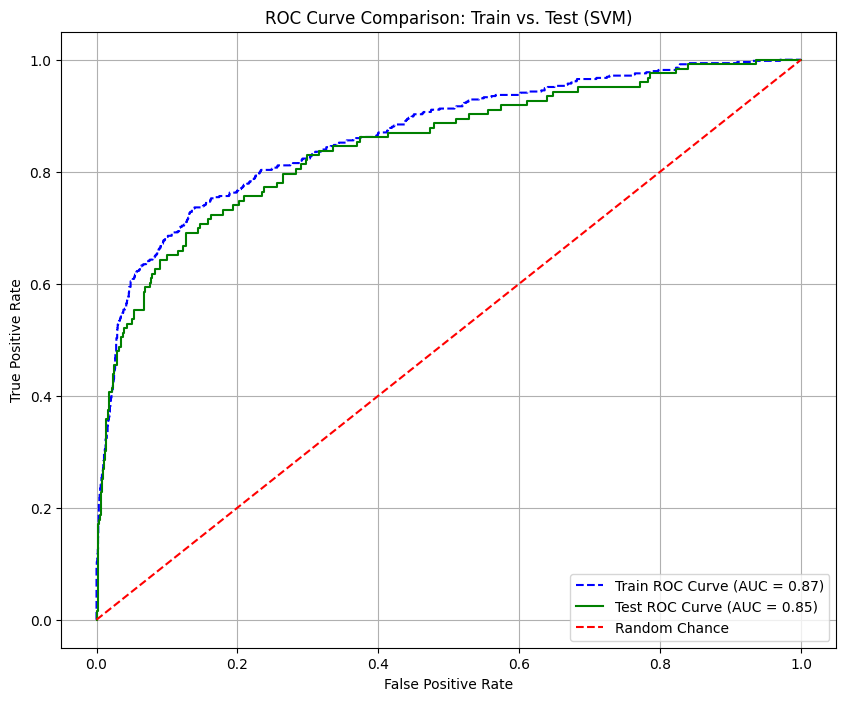

In [82]:
# Memprediksi probabilitas untuk train set menggunakan SVM
y_pred_prob_svm_train = best_svm_model.predict_proba(X_train)[:, 1]

# Menghitung kurva ROC dan skor AUC untuk train set 
fpr_svm_train, tpr_svm_train, _ = roc_curve(y_train_encoded, y_pred_prob_svm_train)
auc_svm_train = roc_auc_score(y_train_encoded, y_pred_prob_svm_train)

# Memprediksi probabilitas untuk test set menggunakan SVM
y_pred_prob_svm_test = best_svm_model.predict_proba(X_test)[:, 1]

# Menghitung kurva ROC dan skor AUC untuk test set
fpr_svm_test, tpr_svm_test, _ = roc_curve(y_test_encoded, y_pred_prob_svm_test)
auc_svm_test = roc_auc_score(y_test_encoded, y_pred_prob_svm_test)

# Plot ROC kurva untuk SVM
plt.figure(figsize=(10, 8))
plt.plot(fpr_svm_train, tpr_svm_train, label=f'Train ROC Curve (AUC = {auc_svm_train:.2f})', color='blue', linestyle='--')
plt.plot(fpr_svm_test, tpr_svm_test, label=f'Test ROC Curve (AUC = {auc_svm_test:.2f})', color='green')

# Menggambarkan garis diagonal yang mewakili peluang acak
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Train vs. Test (SVM)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**<u>Insight: </u>**

Model SVM menunjukkan performa yang baik dan seimbang antara data pelatihan dan pengujian, dengan AUC train dan test sebesar 0,87 dan 0,85. Hal ini menandakan bahwa model dapat membedakan kelas dengan cukup baik dan tidak mengalami overfitting yang signifikan. Grafik ROC yang serupa antara data pelatihan dan pengujian menunjukkan bahwa model memiliki kemampuan generalisasi yang baik, membuatnya cukup handal dalam memprediksi data baru.

# BAB IX. Model Saving

In [ ]:
pickle.dump(best_svm_model, open('model.pkl', 'wb'))

# BAB X. Model Inference

Model Inference terdapat di file `P1M2_Joni_inf.ipynb`

# BAB XI. Pengambilan Kesimpulan

**<u>Kesimpulan: </u>**

- SVC adalah model terbaik dalam hal mendeteksi kelas positif berdasarkan recall dan AUC, dengan kinerja yang konsisten dan kemampuan generalisasi yang baik.

- Setelah dilakukan tuning, kinerja model SVC semakin meningkat, menjadikannya lebih efektif dalam mendeteksi kelas positif.

- SVC tidak menunjukkan tanda-tanda overfitting yang signifikan, dan dapat diandalkan untuk memprediksi data baru berdasarkan grafik ROC yang serupa antara pelatihan dan pengujian.


Secara keseluruhan, SVC setelah tuning menjadi pilihan terbaik untuk model ini, dengan kinerja yang baik dan konsisten pada train dan test set

# Conceptual Problems

## a. Latar belakang adanya bagging dan cara kerja bagging

**<u>Jawaban: </u>**

**Latar Belakang Adanya Bagging:**

Bagging (singkatan dari *Bootstrap Aggregating*) adalah teknik dalam analisis data dan pembelajaran mesin yang bertujuan meningkatkan akurasi prediksi. Teknik ini dirancang untuk mengatasi ketidakstabilan prediksi dari satu model tunggal dengan cara menggabungkan prediksi dari banyak model sehingga hasil akhirnya lebih konsisten dan akurat. Idenya mirip dengan mengumpulkan pendapat dari banyak sumber tentang suatu topik dan mengambil keputusan berdasarkan suara terbanyak. Dengan cara ini, keputusan akhir biasanya lebih baik dibandingkan dengan hanya mengandalkan satu pendapat.

**Cara Kerja Bagging:**

1. **Mengambil Sampel Acak dari Data**: Proses dimulai dengan mengambil banyak "contoh" kecil dari data yang ada. Sampel diambil secara acak dan bisa saja data yang sama terpilih lebih dari satu kali. Ini mirip dengan mengambil bola dari sebuah kotak dan memasukkannya kembali sebelum mengambil bola berikutnya, sehingga bola yang sama bisa terambil lagi.

2. **Melatih Model pada Setiap Sampel**: Setiap "contoh" data yang diambil digunakan untuk melatih satu model. Hasilnya adalah sekumpulan model, masing-masing dilatih menggunakan data yang sedikit berbeda.

3. **Menggabungkan Hasil dari Semua Model**: Setelah semua model memberikan prediksinya, hasilnya digabungkan:
   - Untuk prediksi angka (seperti harga rumah), rata-rata dari semua prediksi digunakan.
   - Untuk prediksi kategori (seperti spam atau tidak spam), kategori yang paling banyak dipilih oleh model-model tersebut akan menjadi prediksi akhir.

Pendekatan ini menghasilkan prediksi yang lebih stabil dan mengurangi kesalahan, terutama pada model yang sensitif terhadap variasi data. Contoh yang terkenal dari teknik ini adalah **Random Forest**, yang menggunakan banyak *decision tree* untuk mendapatkan hasil prediksi yang lebih akurat.


## b. Perbedaan cara kerja algoritma Random Forest dengan algoritma Boosting SVM!

**<u>Jawaban: </u>**

**Perbandingan Algoritma Random Forest dan Boosting SVM**

| **Aspek**               | **Random Forest**                                      | **Boosting SVM**                                       |
|-------------------------|--------------------------------------------------------|--------------------------------------------------------|
| **Metode Ensemble**      | **Bagging** (Bootstrap Aggregating)                    | **Boosting** (Meningkatkan model bertahap)              |
| **Pendekatan**           | Melatih banyak model (decision tree) secara **paralel** | Melatih model secara **sequential** untuk memperbaiki kesalahan |
| **Penggabungan Model**   | Menggabungkan prediksi dari setiap model secara **independen** (voting atau rata-rata) | Menggabungkan model berturut-turut dengan memberi **bobot pada model yang lebih baik** |
| **Fokus**                | Variasi dalam data dan model untuk mengurangi overfitting | Memperbaiki kesalahan model sebelumnya dengan fokus pada contoh yang salah |
| **Kelebihan**            | - **Robust terhadap noise dan data yang tidak seimbang** <br> - **Tahan terhadap overfitting**               | - **Lebih akurat dalam banyak kasus** <br> - **Fokus pada meningkatkan kinerja** |
| **Kekurangan**           | - Dapat memerlukan banyak memori <br> - Mungkin tidak bekerja dengan baik pada masalah sangat kompleks | - Lebih rentan terhadap **overfitting** jika tidak hati-hati <br> - Lebih lambat untuk dilatih |
| **Cara Penggabungan Model** | Semua pohon berkontribusi **sama** dalam keputusan akhir | Model yang lebih baik diberi **bobot lebih tinggi** dalam penggabungan hasil |
| **Cara Kerja dengan Data**  | Menggunakan **subset acak** dari data dan fitur     | Menggunakan data dan kesalahan dari model sebelumnya untuk melatih model berikutnya |

**Kesimpulan**
- **Random Forest** lebih stabil dan robust dalam menghadapi data yang kompleks dan ketidakseimbangan kelas, berkat pendekatan **bagging** yang melibatkan pelatihan model secara paralel dan penggabungan hasil model secara independen. Hal ini membuat Random Forest lebih tahan terhadap **overfitting** dan lebih efektif untuk data yang memiliki banyak noise.
  
- **Boosting SVM**, di sisi lain, lebih fokus pada **memperbaiki kesalahan** dari model sebelumnya melalui pendekatan **boosting**. Ini menjadikannya lebih **akurat** pada banyak masalah yang lebih kompleks dan memungkinkan untuk menangani masalah **kesalahan klasifikasi** dengan lebih baik. Namun, model boosting lebih rentan terhadap **overfitting** pada data yang terlalu rumit, terutama jika jumlah iterasi terlalu banyak tanpa kontrol yang tepat.



## c. Pengertian Cross Validation

**<u>Jawaban: </u>**

**Pengertian Cross Validation:**

Cross Validation adalah teknik untuk mengevaluasi keakuratan model prediksi, dengan cara menguji model pada berbagai bagian dari data yang sama. Ini membantu memastikan model tidak hanya "hafal" data yang dilatih, tetapi juga dapat memberikan prediksi yang baik pada data baru yang belum pernah dilihat. Teknik ini sangat berguna untuk mengetahui apakah model benar-benar "belajar" dengan baik atau hanya sekadar menyesuaikan data yang ada.

**Cara Kerja Cross Validation:**

Cara paling umum dalam cross validation adalah *k-fold cross validation*:

1. **Membagi Data Menjadi Beberapa Bagian**: Data dibagi menjadi beberapa bagian yang ukurannya sama (misalnya, 5 atau 10 bagian yang disebut “folds”).

2. **Melatih dan Menguji Model pada Setiap Bagian**: Model dilatih pada sebagian besar bagian dan diuji pada satu bagian yang berbeda setiap kali. Proses ini diulangi sampai setiap bagian sudah pernah menjadi data uji satu kali.

3. **Menghitung Rata-Rata Keakuratan**: Setelah model diuji pada setiap bagian, hasil keakuratannya dihitung rata-ratanya. Rata-rata ini memberikan gambaran yang lebih baik tentang seberapa baik model akan bekerja pada data yang benar-benar baru.

Cross Validation membantu memastikan model tidak hanya cocok untuk data yang ada, tetapi juga dapat bekerja dengan baik pada data lain.
